In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

Read customer churn dataset from csv

In [2]:
dataset = pd.read_csv('/home/pc/repos/Telco-Customer-Churn.csv')

Check data type of each feature as well as count of non-null values in them.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7035 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we can see from result of above step that, there are 7043 records in dataset

Tenure, MonthlyCharges & TotalChatges contains some missing values. Let's find count of missing values

In [4]:
print("Total missing values in tenure: ", pd.isna(dataset['tenure']).sum())
print("Total missing values in MonthlyCharges: ", pd.isna(dataset['MonthlyCharges']).sum())
print("Total missing values in TotalCharges: ", pd.isna(dataset['TotalCharges']).sum())

Total missing values in tenure:  8
Total missing values in MonthlyCharges:  97
Total missing values in TotalCharges:  75


We can clearly see that, count of missing values in tenure feature is < 5% (insiginificant) of total records. Whereas count of missing values in "MonthlyCharges" & "TotalCharges" is clearly > 5% of total recods in the dataset.

Let's find type of data present in these 3 features

In [5]:
dataset[['tenure', 'MonthlyCharges', 'TotalCharges']].head(5)

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,29.85
1,34.0,56.95,1889.5
2,2.0,53.85,108.15
3,45.0,42.30,1840.75
4,2.0,70.70,151.65


We can see that all the 3 features contain continous values

Now, since count of missing values in tenure feature is insiginificant, we can either simply delete them or replace them with any randomly picked value. We are gonna delete them.

In [6]:
dataset = dataset.dropna(subset=['tenure'])

Since, count of records which have missing values either in "MonthlyCharges" or in "TotalCharges" are > 5% of total records and since both of these features have continious values, we can replace these missing values either with mean value or median value of feature.

In [7]:
dataset = dataset.fillna(value={'MonthlyCharges':dataset['MonthlyCharges'].mean()})

Since, "TotalCharges" is of object datatype, we first need to convert it to float64 type

In [8]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce',downcast="float")

In [9]:
dataset = dataset.fillna(value={'TotalCharges': dataset['TotalCharges'].mean()})

Now, let's check whether all missing value issues have been resolved or not 

In [10]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

Let's find features with categorical data apply feature engineering on them

In [11]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


Let's first divide dataset between input feature set and target feature

In [12]:
dataset_X = pd.DataFrame(dataset[dataset.columns.values[:-1]])

In [13]:
dataset_Y = pd.DataFrame(dataset[dataset.columns.values[-1]])

We can clearly see that columns:- "gender", "Partner", "Dependents", "PhoneService", "MultipleLines	", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling" & "PaymentMethod" contains categorical values.

Out of these, "Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies" & "PaperlessBilling" have 3 classes:- Yes, No & No internet service. Let's first process them..

Let's convert every single feature given in above comment into n features, where n defines number of classes in the feature.

In [14]:
dataset_X = pd.get_dummies(dataset_X, columns = ["gender", "Partner", "Dependents", 
                                                 "PhoneService", "MultipleLines", 
                                                 "InternetService", "OnlineSecurity", 
                                                 "OnlineBackup", "DeviceProtection", 
                                                 "TechSupport", "StreamingTV", "StreamingMovies", 
                                                 "Contract", "PaperlessBilling", "PaymentMethod"])

Let's drop "customerID", because it has different value for every record and thus it does not provide any support in predicting target value.          

In [15]:
dataset_X = dataset_X.drop(['customerID'], axis=1)

At this point, we are done with basic data cleaning and data preprocessing

Let's now start Exploratory Data Analysis

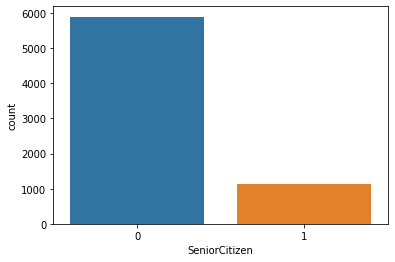

In [16]:
sns.countplot(x="SeniorCitizen", data=dataset_X)
plt.show()

Above plot shows that more than 80% of customers are not senior citizen

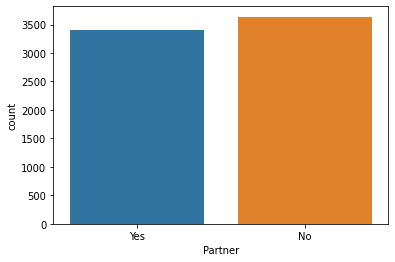

In [17]:
sns.countplot(x="Partner", data=dataset)
plt.show()

Above plot says that near about 50% of customers are partner. But count of customers who are not partner are slighlty higher.

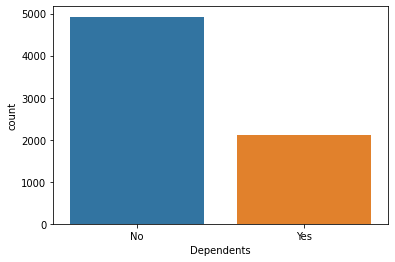

In [18]:
sns.countplot(x="Dependents", data=dataset)
plt.show()

Above plot says that majority of customers don't have dependents

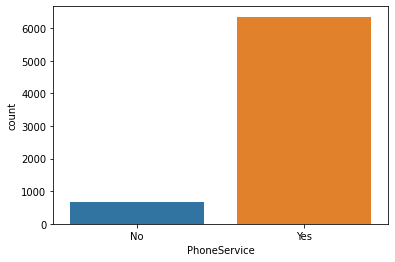

In [19]:
sns.countplot(x="PhoneService", data=dataset)
plt.show()

Above plot says that more that 90% of customers took Phone service

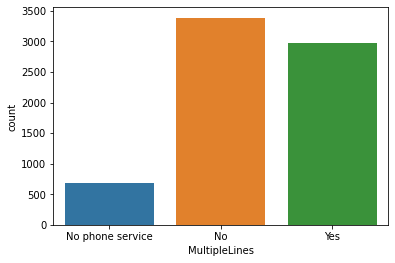

In [20]:
sns.countplot(x="MultipleLines", data=dataset)
plt.show()

Above plot says thatnear about 50% of customers don't have multiple lines, near about 40% of customers have multiple lines and 10 % of customers have no phone service

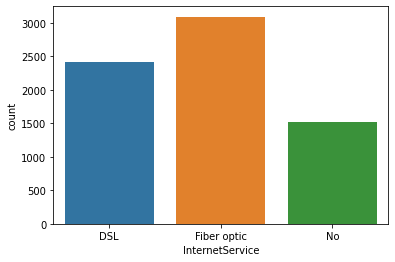

In [21]:
sns.countplot(x="InternetService", data=dataset)
plt.show()

Above plot shows that near about majority (43%) of customers are having fiber optic connection, near about 28-29% customers have DSL connection remaining customers don't have connection.

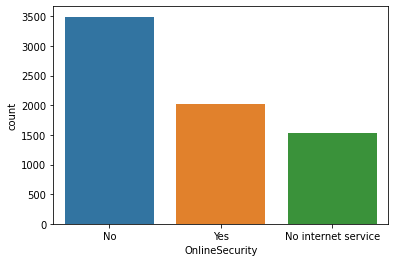

In [22]:
sns.countplot(x="OnlineSecurity", data=dataset)
plt.show()

Above plot shows that nearly 50% of customers don't have online security, nearly 28% of customers have online security and rest don't have internet connection

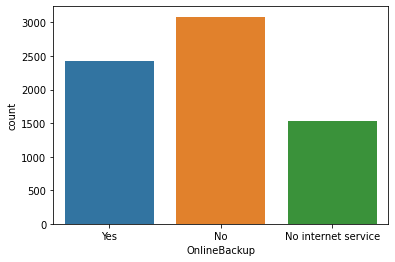

In [24]:
sns.countplot(x="OnlineBackup", data=dataset)
plt.show()

Near about 44% of customers don't have online backup, 28-29% customers have online backup, rest of of them don't have internet connection.

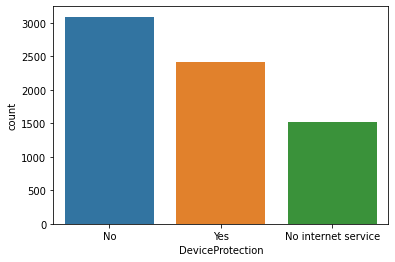

In [25]:
sns.countplot(x="DeviceProtection", data=dataset)
plt.show()

Nearly 45% of customers don't have device protection, nearly 28% have device protection, rest don't have internet connection.

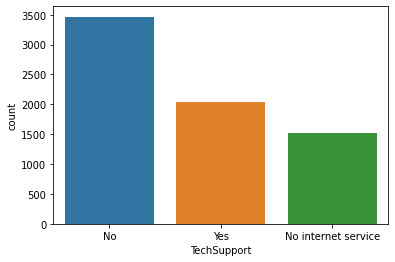

In [27]:
sns.countplot(x="TechSupport", data=dataset)
plt.show()

Nearly 50% of customers don't have tech support, 28% have tech support, rest don't have internet connection.

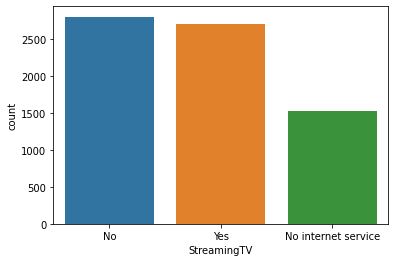

In [28]:
sns.countplot(x="StreamingTV", data=dataset)
plt.show()

Nearly 40% of customers don't have streaming TV and equal number of customer have streaming TV, rest of them don't have internet connection.

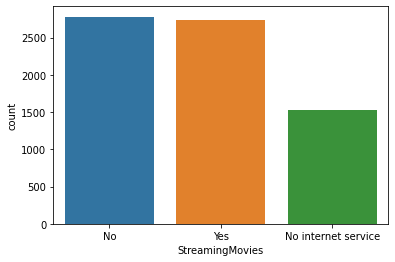

In [29]:
sns.countplot(x="StreamingMovies", data=dataset)
plt.show()

Nearly 40% of customers don't have streaming movies and equal number of customer have streaming movies, rest of them don't have internet connection.

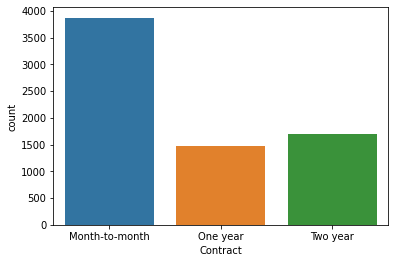

In [30]:
sns.countplot(x="Contract", data=dataset)
plt.show()

More than 50% customers of customers have month-to-month contract, remaining customers are equally divided between 1 yr contract and 2 yr contract.

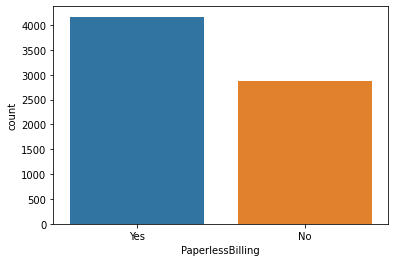

In [31]:
sns.countplot(x="PaperlessBilling", data=dataset)
plt.show()

Nearly 60% of customers have paper less billing service, rest of them don't have it.

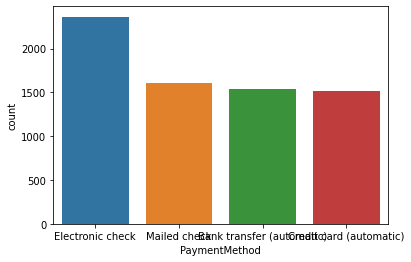

In [32]:
sns.countplot(x="PaymentMethod", data=dataset)
plt.show()

Nearly 30% of customers pay through electronic cheque. Nearly 23% of customers use either Mailed cheque or credit card or bank transfer.